In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ipl_dataset=pd.read_csv('ipl.csv')

In [3]:
ipl_dataset.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
ipl_dataset.drop(['mid','batsman','bowler','striker','non-striker'],axis=1,inplace=True)

In [5]:
ipl_dataset.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [6]:
ipl_dataset.dtypes

date               object
venue              object
bat_team           object
bowl_team          object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
total               int64
dtype: object

In [7]:
null_values=ipl_dataset.isnull()

In [8]:
for column in ipl_dataset.columns.tolist():
    print(null_values[column].value_counts())

False    76014
Name: date, dtype: int64
False    76014
Name: venue, dtype: int64
False    76014
Name: bat_team, dtype: int64
False    76014
Name: bowl_team, dtype: int64
False    76014
Name: runs, dtype: int64
False    76014
Name: wickets, dtype: int64
False    76014
Name: overs, dtype: int64
False    76014
Name: runs_last_5, dtype: int64
False    76014
Name: wickets_last_5, dtype: int64
False    76014
Name: total, dtype: int64


In [9]:
from datetime import datetime

In [10]:
# for index in range(ipl_dataset.shape[0]):
#     ipl_dataset.loc[index,'date']=datetime.strptime(ipl_dataset.loc[index,'date'],'%Y-%m-%d')

ipl_dataset['date'] = ipl_dataset['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [11]:
type(ipl_dataset.loc[0,'date'])

pandas._libs.tslibs.timestamps.Timestamp

In [12]:
ipl_dataset.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [13]:
stadiums_not_to_include=['OUTsurance Oval','De Beers Diamond Oval','Buffalo Park','Green Park','Nehru Stadium','Newlands','Shaheed Veer Narayan Singh International Stadium','Kingsmead','JSCA International Stadium Complex','Barabati Stadium','St George\'s Park','New Wanderers Stadium','SuperSport Park','Kingsmead','Brabourne Stadium','Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium']

In [14]:
ipl_dataset=ipl_dataset[~ipl_dataset['venue'].isin(stadiums_not_to_include)]

In [15]:
ipl_dataset['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Sardar Patel Stadium, Motera',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium',
       'Holkar Cricket Stadium', 'Subrata Roy Sahara Stadium',
       'Sheikh Zayed Stadium', 'Sharjah Cricket Stadium',
       'Dubai International Cricket Stadium',
       'Maharashtra Cricket Association Stadium',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Saurashtra Cricket Association Stadium'], dtype=object)

In [16]:
ipl_dataset['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [17]:
consistent_teams=['Kolkata Knight Riders','Chennai Super Kings','Rajasthan Royals','Mumbai Indians','Kings XI Punjab','Royal Challengers Bangalore','Delhi Daredevils','Sunrisers Hyderabad']

In [18]:
ipl_dataset=ipl_dataset[ipl_dataset['bat_team'].isin(consistent_teams) & ipl_dataset['bowl_team'].isin(consistent_teams)]

In [19]:
ipl_dataset['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [20]:
ipl_dataset['bowl_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Kolkata Knight Riders',
       'Sunrisers Hyderabad'], dtype=object)

In [21]:
ipl_dataset.shape

(45508, 10)

In [22]:
ipl_dataset.tail()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
75884,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107
75885,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107
75886,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107
75887,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107
75888,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,10,18.5,23,5,107


In [23]:
ipl_dataset.reset_index(inplace=True)

In [24]:
ipl_dataset.tail()

,index,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
45503,75884,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107
45504,75885,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107
45505,75886,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107
45506,75887,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107
45507,75888,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,10,18.5,23,5,107


In [25]:
ipl_dataset.drop(['index'],axis=1,inplace=True)

In [26]:
ipl_dataset.tail()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
45503,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107
45504,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107
45505,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107
45506,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107
45507,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,10,18.5,23,5,107


In [27]:
for index in range(ipl_dataset.shape[0]):
    if(ipl_dataset.loc[index,'bat_team']=='Kings XI Punjab'):
        ipl_dataset.loc[index,'bat_team']='Punjab Kings'
    if(ipl_dataset.loc[index,'bowl_team']=='Kings XI Punjab'):
        ipl_dataset.loc[index,'bowl_team']='Punjab Kings'
    if(ipl_dataset.loc[index,'venue']=='Feroz Shah Kotla'):
        ipl_dataset.loc[index,'venue']='Arun Jaitley Stadium'
    if(ipl_dataset.loc[index,'venue']=='Sardar Patel Stadium, Motera'):
        ipl_dataset.loc[index,'venue']='Narendra Modi Stadium'

In [28]:
ipl_dataset['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Punjab Kings', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [29]:
ipl_dataset['bowl_team'].unique()

array(['Royal Challengers Bangalore', 'Punjab Kings', 'Delhi Daredevils',
       'Rajasthan Royals', 'Mumbai Indians', 'Chennai Super Kings',
       'Kolkata Knight Riders', 'Sunrisers Hyderabad'], dtype=object)

In [30]:
ipl_dataset['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali',
       'Arun Jaitley Stadium', 'Wankhede Stadium',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Eden Gardens', 'Dr DY Patil Sports Academy',
       'Narendra Modi Stadium',
       'Himachal Pradesh Cricket Association Stadium',
       'Subrata Roy Sahara Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'Sheikh Zayed Stadium', 'Sharjah Cricket Stadium',
       'Dubai International Cricket Stadium',
       'Maharashtra Cricket Association Stadium',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Holkar Cricket Stadium'], dtype=object)

In [31]:
ipl_dataset.head(200)

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222
...,...,...,...,...,...,...,...,...,...,...
195,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,Punjab Kings,124,3,11.4,64,1,240
196,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,Punjab Kings,125,3,11.5,64,1,240
197,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,Punjab Kings,127,3,11.6,65,1,240
198,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,Punjab Kings,128,3,12.0,66,0,240


In [32]:
ipl_dataset=ipl_dataset[ipl_dataset['overs']>=5.0]

In [33]:
ipl_dataset.reset_index(inplace=True)
ipl_dataset.drop(['index'],axis=1,inplace=True)

In [34]:
ipl_dataset.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [35]:
ipl_dataset=pd.get_dummies(data=ipl_dataset,columns=['venue','bat_team','bowl_team'])

In [36]:
ipl_dataset

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,venue_Arun Jaitley Stadium,venue_Dr DY Patil Sports Academy,venue_Dubai International Cricket Stadium,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Punjab Kings,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
0,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33917,2017-05-19,106,9,18.1,29,4,107,0,0,0,...,0,0,0,0,0,1,0,0,0,0
33918,2017-05-19,107,9,18.2,29,4,107,0,0,0,...,0,0,0,0,0,1,0,0,0,0
33919,2017-05-19,107,9,18.3,28,4,107,0,0,0,...,0,0,0,0,0,1,0,0,0,0
33920,2017-05-19,107,9,18.4,24,4,107,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [37]:
ipl_dataset.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'venue_Arun Jaitley Stadium',
       'venue_Dr DY Patil Sports Academy',
       'venue_Dubai International Cricket Stadium', 'venue_Eden Gardens',
       'venue_Himachal Pradesh Cricket Association Stadium',
       'venue_Holkar Cricket Stadium', 'venue_M Chinnaswamy Stadium',
       'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Maharashtra Cricket Association Stadium',
       'venue_Narendra Modi Stadium',
       'venue_Punjab Cricket Association IS Bindra Stadium, Mohali',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Sawai Mansingh Stadium', 'venue_Sharjah Cricket Stadium',
       'venue_Sheikh Zayed Stadium', 'venue_Subrata Roy Sahara Stadium',
       'venue_Wankhede Stadium', 'bat_team_Chennai Super Kings',
       'bat_team_Delhi Daredevils', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumba

In [38]:
ipl_dataset=ipl_dataset[['date','venue_Dr DY Patil Sports Academy',
       'venue_Dubai International Cricket Stadium', 'venue_Eden Gardens',
       'venue_Himachal Pradesh Cricket Association Stadium',
       'venue_Holkar Cricket Stadium', 'venue_M Chinnaswamy Stadium',
       'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Maharashtra Cricket Association Stadium',
       'venue_Narendra Modi Stadium',
       'venue_Punjab Cricket Association IS Bindra Stadium, Mohali',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Sawai Mansingh Stadium', 'venue_Sharjah Cricket Stadium',
       'venue_Sheikh Zayed Stadium', 'venue_Subrata Roy Sahara Stadium',
       'venue_Wankhede Stadium', 'bat_team_Chennai Super Kings',
       'bat_team_Delhi Daredevils', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Punjab Kings',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Punjab Kings',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad','runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total']]

In [39]:
ipl_dataset.columns

Index(['date', 'venue_Dr DY Patil Sports Academy',
       'venue_Dubai International Cricket Stadium', 'venue_Eden Gardens',
       'venue_Himachal Pradesh Cricket Association Stadium',
       'venue_Holkar Cricket Stadium', 'venue_M Chinnaswamy Stadium',
       'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Maharashtra Cricket Association Stadium',
       'venue_Narendra Modi Stadium',
       'venue_Punjab Cricket Association IS Bindra Stadium, Mohali',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Sawai Mansingh Stadium', 'venue_Sharjah Cricket Stadium',
       'venue_Sheikh Zayed Stadium', 'venue_Subrata Roy Sahara Stadium',
       'venue_Wankhede Stadium', 'bat_team_Chennai Super Kings',
       'bat_team_Delhi Daredevils', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Punjab Kings',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
 

In [40]:
ipl_dataset.head(100)

,date,venue_Dr DY Patil Sports Academy,venue_Dubai International Cricket Stadium,venue_Eden Gardens,venue_Himachal Pradesh Cricket Association Stadium,venue_Holkar Cricket Stadium,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk",venue_Maharashtra Cricket Association Stadium,venue_Narendra Modi Stadium,...,bowl_team_Punjab Kings,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,0,0,0,0,0,1,0,0,0,...,0,0,1,0,61,0,5.1,59,0,222
1,2008-04-18,0,0,0,0,0,1,0,0,0,...,0,0,1,0,61,1,5.2,59,1,222
2,2008-04-18,0,0,0,0,0,1,0,0,0,...,0,0,1,0,61,1,5.3,59,1,222
3,2008-04-18,0,0,0,0,0,1,0,0,0,...,0,0,1,0,61,1,5.4,59,1,222
4,2008-04-18,0,0,0,0,0,1,0,0,0,...,0,0,1,0,61,1,5.5,58,1,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2008-04-19,0,0,0,0,0,0,0,0,0,...,1,0,0,0,53,1,5.4,48,1,240
96,2008-04-19,0,0,0,0,0,0,0,0,0,...,1,0,0,0,53,1,5.5,44,1,240
97,2008-04-19,0,0,0,0,0,0,0,0,0,...,1,0,0,0,53,1,5.6,40,1,240
98,2008-04-19,0,0,0,0,0,0,0,0,0,...,1,0,0,0,57,1,6.1,40,1,240


In [41]:
X_train=ipl_dataset.drop(labels='total',axis=1)[ipl_dataset['date'].dt.year<=2016]
Y_train=ipl_dataset[ipl_dataset['date'].dt.year<=2016]['total'].values

In [42]:
(X_train)

,date,venue_Dr DY Patil Sports Academy,venue_Dubai International Cricket Stadium,venue_Eden Gardens,venue_Himachal Pradesh Cricket Association Stadium,venue_Holkar Cricket Stadium,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk",venue_Maharashtra Cricket Association Stadium,venue_Narendra Modi Stadium,...,bowl_team_Mumbai Indians,bowl_team_Punjab Kings,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5
0,2008-04-18,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,61,0,5.1,59,0
1,2008-04-18,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,61,1,5.2,59,1
2,2008-04-18,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,61,1,5.3,59,1
3,2008-04-18,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,61,1,5.4,59,1
4,2008-04-18,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,61,1,5.5,58,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31139,2016-05-29,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,194,7,19.2,54,4
31140,2016-05-29,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,200,7,19.3,56,4
31141,2016-05-29,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,201,7,19.4,56,4
31142,2016-05-29,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,202,7,19.5,57,4


In [43]:
X_test=ipl_dataset.drop(labels='total',axis=1)[ipl_dataset['date'].dt.year>=2017]
Y_test=ipl_dataset[ipl_dataset['date'].dt.year>=2017]['total'].values

In [44]:
X_train.drop(labels='date',axis=1,inplace=True)
X_test.drop(labels='date',axis=1,inplace=True)

In [45]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [46]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)

In [47]:
ridge_regressor

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [48]:
ridge_regressor.fit(X_train,Y_train)

c:\users\sahib\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.81702e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
c:\users\sahib\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.83079e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
c:\users\sahib\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.86541e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
c:\users\sahib\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.75953e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
c:\users\sahib\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.82577e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
c:\us

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [49]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-357.5243561775755


In [50]:
prediction_ridge=ridge_regressor.predict(X_test)

c:\users\sahib\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\sahib\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


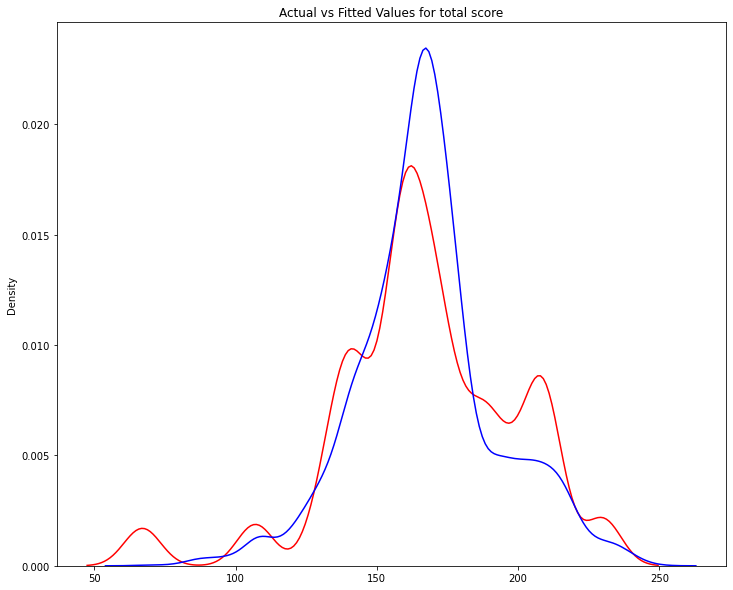

In [51]:
plt.figure(figsize=(12,10))


ax1 = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(prediction_ridge, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for total score')

plt.show()
plt.close()

In [52]:
from sklearn.linear_model import Lasso

In [53]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

In [54]:
lasso_regressor

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [55]:
lasso_regressor.fit(X_train,Y_train)

c:\users\sahib\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3549536.1231037946, tolerance: 2096.608759237406
  model = cd_fast.enet_coordinate_descent(
c:\users\sahib\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3468928.691060751, tolerance: 2102.2416908448736
  model = cd_fast.enet_coordinate_descent(
c:\users\sahib\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3795787.890383442, tolerance: 2283.6541920529803
  model = cd_fast.enet_coordinate_descent(
c:\users\sahib\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You mi

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [56]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-332.24031789171414


In [57]:
prediction_lasso=lasso_regressor.predict(X_test)

c:\users\sahib\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\sahib\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


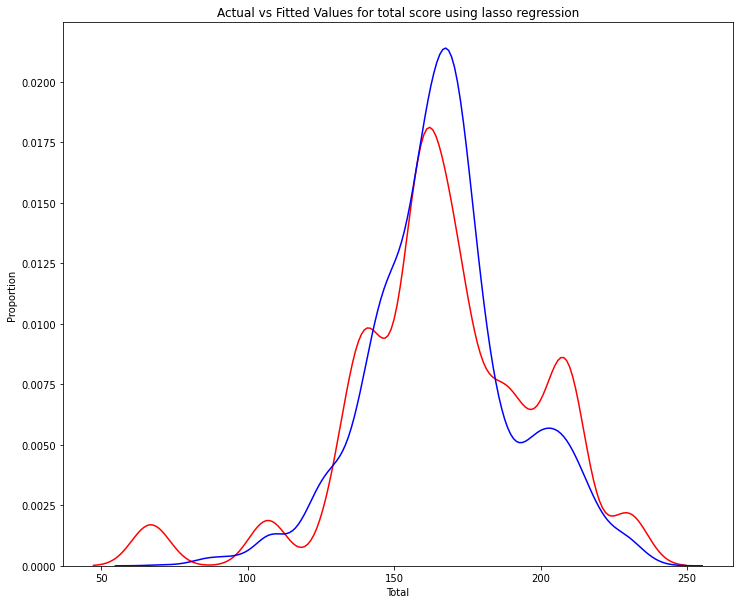

In [58]:
plt.figure(figsize=(12,10))


ax2 = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(prediction_lasso, hist=False, color="b", label="Fitted Values" , ax=ax2)


plt.title('Actual vs Fitted Values for total score using lasso regression')
plt.xlabel('Total')
plt.ylabel('Proportion')
plt.show()
plt.close()

In [64]:
np.set_printoptions(threshold=np.inf)
print(np.max(Y_test-prediction_lasso))

41.234198950840266


In [63]:
print(np.max(Y_test-prediction_ridge))

39.536849608366765


In [65]:
print(np.min(Y_test-prediction_lasso))

-71.70329471975427


In [66]:
print(np.min(Y_test-prediction_ridge))

-72.12701525525225


c:\users\sahib\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

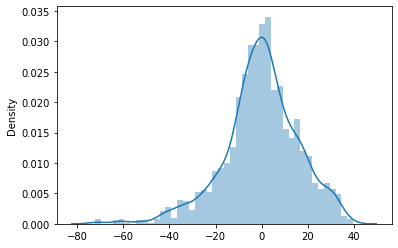

In [67]:
sns.distplot(Y_test-prediction_ridge)

c:\users\sahib\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

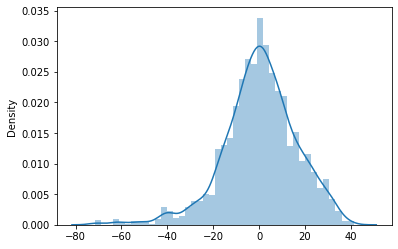

In [68]:
sns.distplot(Y_test-prediction_lasso)